In [3]:
import os,glob,path
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import cv2

In [7]:
classes=['Parasitized','Uninfected']

In [8]:
Parasitized_images= glob.glob("C:/Users/yashwanth/Downloads/cell-images-for-detecting-malaria/cell_images/Parasitized/*.png")

In [9]:
Uninfected_images= glob.glob("C:/Users/yashwanth/Downloads/cell-images-for-detecting-malaria/cell_images/Uninfected/*.png")

In [10]:
img_list=[]

In [11]:
for img in Parasitized_images:
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(32,32))
    img_list.append(img)

In [20]:
img_array=np.array(img_list)

In [21]:
img_array.shape

(27558, 32, 32, 3)

In [18]:
for img in Uninfected_images:
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(32,32))
    img_list.append(img)

In [19]:
img_list

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0

In [23]:
img_array=img_array.astype('float32')

In [24]:
img_array /=255

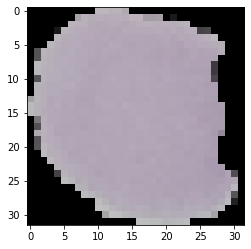

In [25]:
plt.imshow(img_array[20000])

In [27]:
img_array.shape

(27558, 32, 32, 3)

In [28]:
img_array.dtype

dtype('float32')

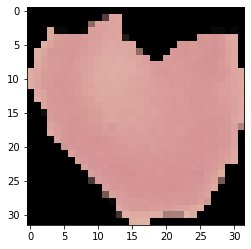

In [31]:
plt.imshow(img_array[14000])

In [38]:
number_of_samples=img_array.shape[0]

In [39]:
nos=number_of_samples


In [40]:
nos

27558

In [44]:
l=np.ones((nos,),dtype='int64')
l.shape

(27558,)

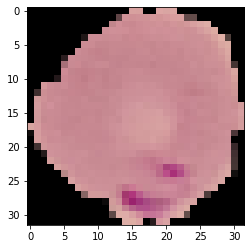

In [43]:
plt.imshow(img_array[13778])

In [47]:
l[0:13778]=0
l[13778:]=1

In [48]:
from keras.utils import np_utils
number_of_classes=2
y=np_utils.to_categorical(l,number_of_classes)

Using TensorFlow backend.


In [49]:
x=img_array

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

In [53]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="sigmoid"))



In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [56]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [57]:
# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=14,
    validation_data=(x_test, y_test),
    shuffle=True
)


Train on 22046 samples, validate on 5512 samples
Epoch 1/14
22046/22046 [==============================] - 189s 9ms/step - loss: 0.6918 - accuracy: 0.5236 - val_loss: 0.6793 - val_accuracy: 0.5787
Epoch 2/14
22046/22046 [==============================] - 161s 7ms/step - loss: 0.6604 - accuracy: 0.6146 - val_loss: 0.6417 - val_accuracy: 0.6579
Epoch 3/14
22046/22046 [==============================] - 159s 7ms/step - loss: 0.6452 - accuracy: 0.6395 - val_loss: 0.6327 - val_accuracy: 0.6760
Epoch 4/14
22046/22046 [==============================] - 158s 7ms/step - loss: 0.6023 - accuracy: 0.6877 - val_loss: 0.5441 - val_accuracy: 0.7310
Epoch 5/14
22046/22046 [==============================] - 157s 7ms/step - loss: 0.5001 - accuracy: 0.7678 - val_loss: 0.3934 - val_accuracy: 0.8423
Epoch 6/14
22046/22046 [==============================] - 157s 7ms/step - loss: 0.2769 - accuracy: 0.8930 - val_loss: 0.2231 - val_accuracy: 0.9325
Epoch 7/14
22046/22046 [==============================] - 159s 

In [70]:
import keras
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [74]:
model.save('CNN_malaria_weights.model')

In [75]:
new_model=keras.models.load_model('CNN_malaria_weights.model')

In [85]:
pred=new_model.predict_classes(x_test)

In [64]:
print(new_model)

None


In [66]:
model.predict_classes(x_test)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

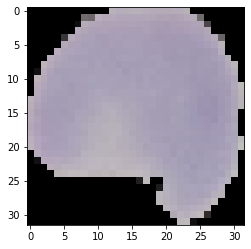

In [69]:
plt.imshow(x_test[2])

In [82]:
model.(y_test)

ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (5512, 2)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
confusion_matrix(pred,y_test)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [87]:
import scipy

In [88]:
img=scipy.misc.imread('uninfected.png')

C:\Users\yashwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [89]:
img=scipy.misc.imresize(img,(32,32))

C:\Users\yashwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


In [90]:
img=img.astype('float32')

In [93]:
img /= 255

In [95]:
img=img.reshape(1,32,32,3)

In [97]:
new_model.predict_classes(img)

array([1], dtype=int64)

In [105]:
pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [106]:
target=['class 0(Parasitized)','class 1(Uninfected)']

In [112]:
confusion_matrix(np.argmax(y_test,axis=1),pred)

array([[2554,  149],
       [ 115, 2694]], dtype=int64)

In [111]:
np.argmax((2,1))

0

In [115]:
print(classification_report(np.argmax(y_test,axis=1),pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2703
           1       0.95      0.96      0.95      2809

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



In [118]:
x_train_pred=new_model.predict_classes(x_train)

In [119]:
print(classification_report(np.argmax(y_train,axis=1),x_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11075
           1       0.95      0.96      0.95     10971

    accuracy                           0.95     22046
   macro avg       0.95      0.95      0.95     22046
weighted avg       0.95      0.95      0.95     22046



In [120]:
dic={0:'Parasitized',1:'Uninfected'}

In [128]:
dic[0]

'Parasitized'

In [137]:
for i in range(0,2):
    print(dic[i])

Parasitized
Uninfected


In [141]:
#'uninfected.png'
img=input()
def fun(dic,img):
    img=scipy.misc.imread(img)
    img=scipy.misc.imresize(img,(32,32))
    img=img.astype('float32')
    img /= 255
    img=img.reshape(1,32,32,3)
    clas=new_model.predict(img)
    clas=np.argmax(clas)
    print(dic[clas])
fun(dic,img)       

uninfected.png
Uninfected


C:\Users\yashwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\yashwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


In [139]:
fun(dic,img)

C:\Users\yashwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\yashwanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


Uninfected
